In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv(r'C:\Users\d.sahin\Desktop\denetcitalebi\analizdosyası\analysis.csv')

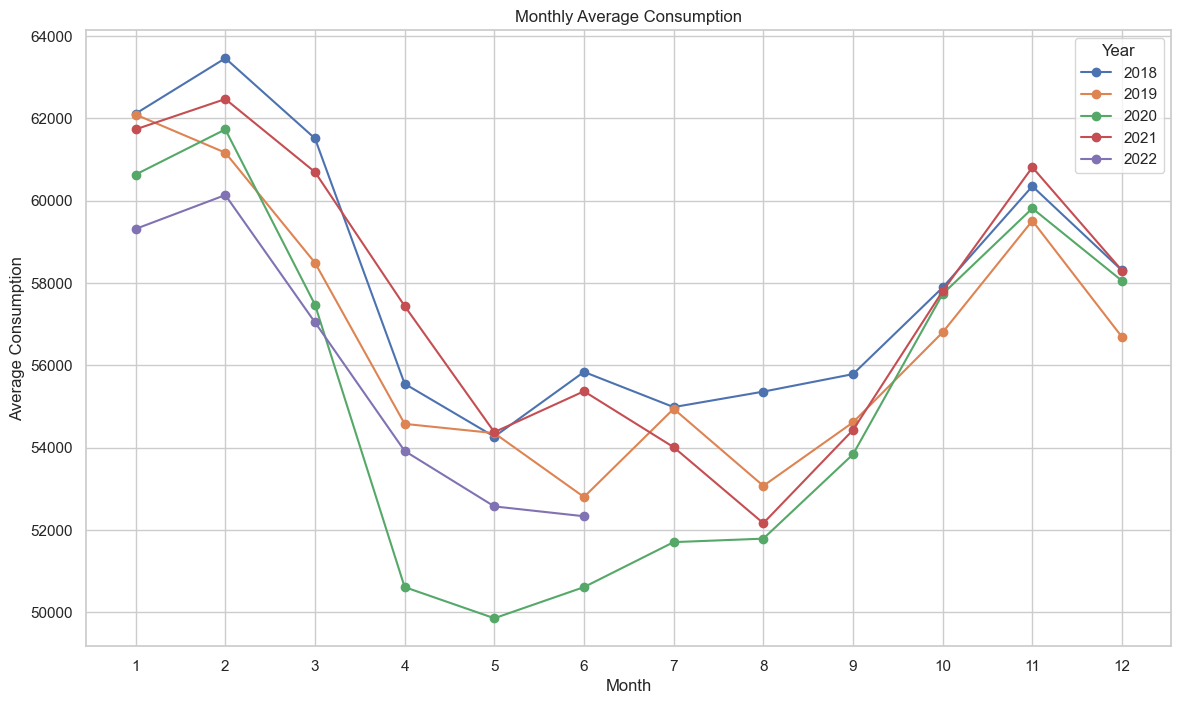

In [15]:
sns.set(style="whitegrid")

monthly_avg_consumption = df.groupby(['Year', 'Month'])['consumption'].mean().unstack(level=0)

plt.figure(figsize=(14, 8))
for year in monthly_avg_consumption.columns:
    plt.plot(monthly_avg_consumption.index, monthly_avg_consumption[year], marker='o', label=year)

plt.title('Monthly Average Consumption')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.xticks(np.arange(1, 13, 1))
plt.legend(title='Year')
plt.grid(True)
plt.show()

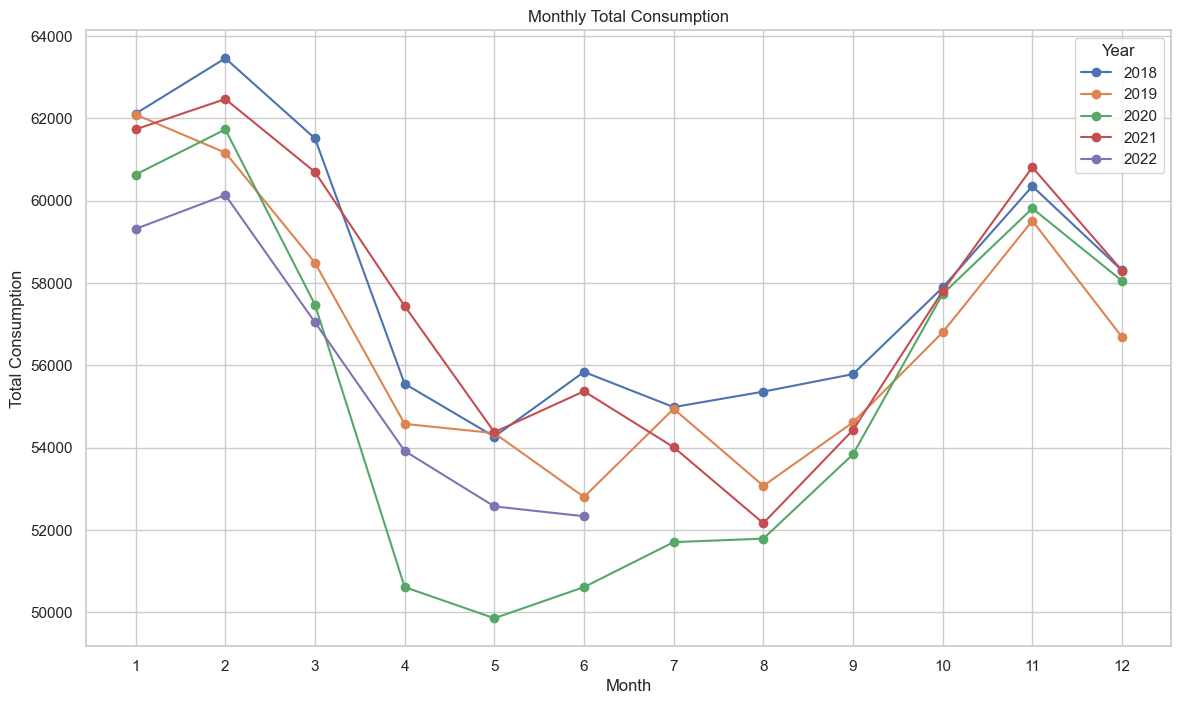

In [16]:
sns.set(style="whitegrid")

monthly_total_consumption = df.groupby(['Year', 'Month'])['consumption'].sum().unstack(level=0)

plt.figure(figsize=(14, 8))
for year in monthly_total_consumption.columns:
    plt.plot(monthly_total_consumption.index, monthly_avg_consumption[year], marker='o', label=year)

plt.title('Monthly Total Consumption')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.xticks(np.arange(1, 13, 1))
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [17]:
monthly_averages = df.groupby(['Year', 'Month'])[['consumption', 'TEMPERATURE', 'PMI_Index', 'PMI_Index2']].mean()

correlation_matrix = monthly_averages.corr()

print(correlation_matrix)

             consumption  TEMPERATURE  PMI_Index  PMI_Index2
consumption     1.000000    -0.795969  -0.107964   -0.241317
TEMPERATURE    -0.795969     1.000000   0.090173    0.033949
PMI_Index      -0.107964     0.090173   1.000000    0.052673
PMI_Index2     -0.241317     0.033949   0.052673    1.000000


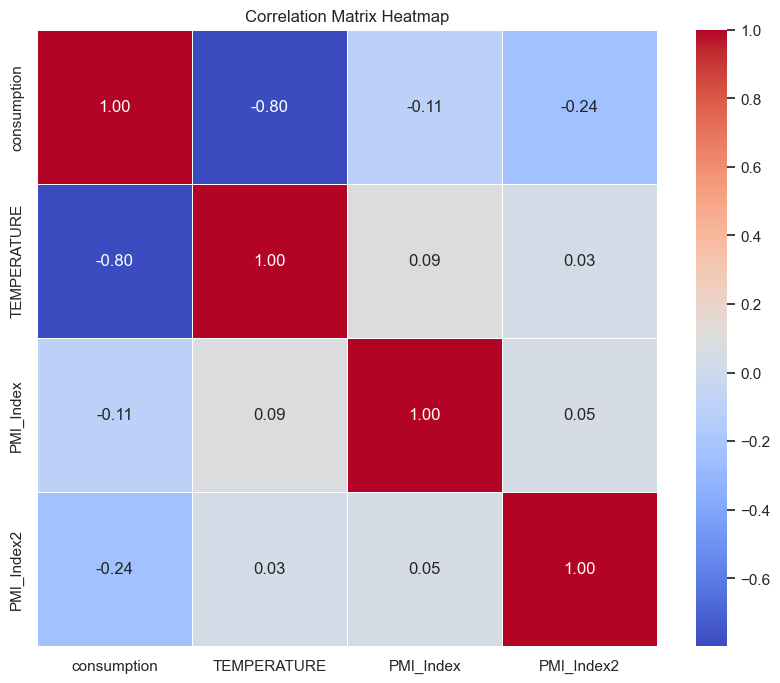

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

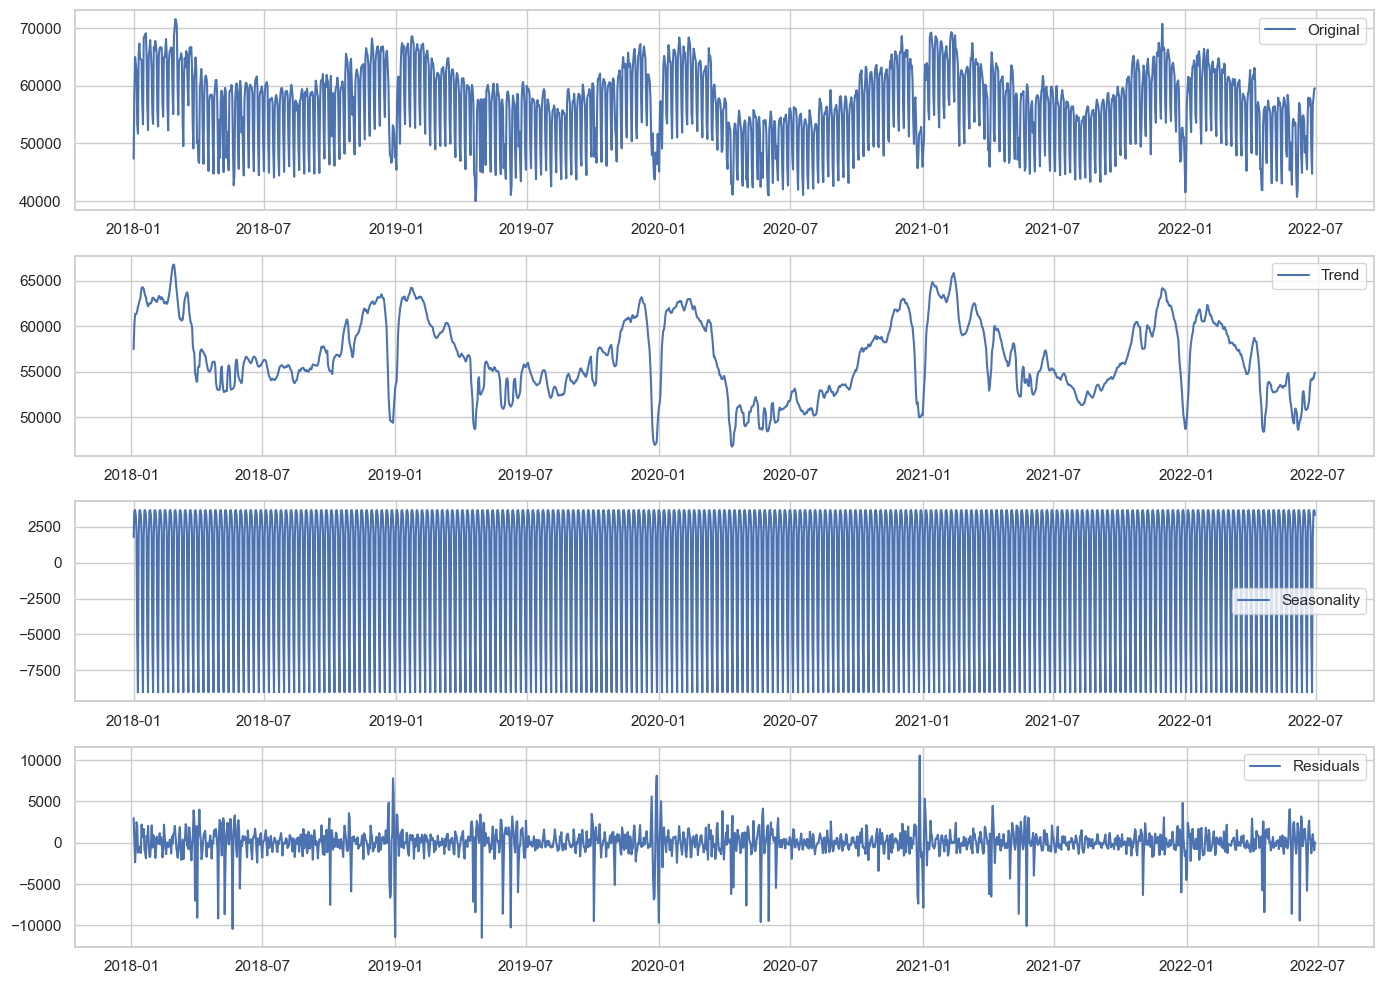

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd


df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df_daily = df.set_index('Date')

daily_consumption = df_daily['consumption'].resample('D').mean().dropna()

decomposition = seasonal_decompose(daily_consumption, model='additive')

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(daily_consumption, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()